In [1]:
import os
import tensorflow as tf
tf.enable_eager_execution()
assert(tf.executing_eagerly)
import sys
sys.path.append("../")
from dataset_utils.tf_data_loader import ImageInputPipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Analyze Copper dataset

## Analyze test dataset

In [2]:
base_dir = "/mnt/sda/deep_learning/defect_segmentation/images_copper"
test_rel_map = {"images": "test", "labels": "test_label"}
assert(os.path.isdir(base_dir))

In [3]:
test_input_pipeline = ImageInputPipeline(test_rel_map, ".tif", base_dir, shuffle=False)

Number of examples in dataset:  357


In [4]:
size = (256, 256)
num_pix_img = size[0] * size[1]
test_ds = test_input_pipeline._input_fn(size=size, batch_size=1, augment=False)

In [5]:
pix_sum_crack = []
pix_sum_ext = []
for img, mask in test_ds:
    pix_sum_crack.append((mask.numpy()==1).sum())
    pix_sum_ext.append((mask.numpy()==2).sum())

W0417 17:10:42.410884 139731811669760 backprop.py:820] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string
W0417 17:10:42.411256 139730603710208 backprop.py:820] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string
W0417 17:10:42.411400 139731862025984 backprop.py:820] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string
W0417 17:10:42.411539 139731954296576 backprop.py:820] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string
W0417 17:10:42.411645 139730628888320 backprop.py:820] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string


In [6]:
test_df = pd.DataFrame(zip(pix_sum_crack, pix_sum_ext), columns=("#pix_crack", "#pix_ext")).replace(0, np.nan)
test_df.head()

,#pix_crack,#pix_ext
0,NaN,NaN
1,NaN,367.0
2,NaN,5067.0
3,NaN,2887.0
4,NaN,11503.0


In [7]:
test_df["%pix_crack"] = np.where(pd.notna(test_df["#pix_crack"]), 100 * test_df["#pix_crack"]/num_pix_img, 0)
test_df["%pix_crack_na"] = 100 * test_df["#pix_crack"]/num_pix_img
test_df["%pix_ext"] = np.where(pd.notna(test_df["#pix_ext"]), 100 * test_df["#pix_ext"]/num_pix_img, 0)
test_df["%pix_ext_na"] = 100 * test_df["#pix_ext"]/num_pix_img
test_df.head()

,#pix_crack,#pix_ext,%pix_crack,%pix_crack_na,%pix_ext,%pix_ext_na
0,NaN,NaN,0.0,NaN,0.000000,NaN
1,NaN,367.0,0.0,NaN,0.559998,0.559998
2,NaN,5067.0,0.0,NaN,7.731628,7.731628
3,NaN,2887.0,0.0,NaN,4.405212,4.405212
4,NaN,11503.0,0.0,NaN,17.552185,17.552185


The summary below shows that:

- Percentage of pixels with extrusion in the dataset is 12.125%
- Out of 357 images, 321 have extrusions in it
- If only images with extrusions are considered, then the percentage of pixels with extrusion is 13.485%

In [8]:
test_df.describe()

,#pix_crack,#pix_ext,%pix_crack,%pix_crack_na,%pix_ext,%pix_ext_na
count,30.000000,321.000000,357.000000,30.000000,357.000000,321.000000
mean,59.300000,8837.323988,0.007604,0.090485,12.124886,13.484686
std,62.817277,8388.314917,0.037154,0.095852,12.798256,12.799553
min,2.000000,3.000000,0.000000,0.003052,0.000000,0.004578
25%,21.500000,2361.000000,0.000000,0.032806,2.252197,3.602600
50%,44.500000,6269.000000,0.000000,0.067902,8.149719,9.565735
75%,70.000000,12660.000000,0.000000,0.106812,18.466187,19.317627
max,316.000000,41881.000000,0.482178,0.482178,63.905334,63.905334


The histogram below shows that 80% of the images with extrusions have percentage of extrusion area in the image in the range from 0 to 20.45

/home/labor/miniconda3/envs/dl_tf_env/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/labor/miniconda3/envs/dl_tf_env/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 38.,  60.,  85., 106., 124., 134., 152., 170., 183., 188., 199.,
        208., 218., 231., 240., 249., 253., 262., 265., 267., 276., 284.,
        285., 287., 291., 293., 295., 297., 298., 301., 305., 306., 306.,
        307., 309., 310., 312., 313., 315., 315., 315., 317., 318., 318.,
        319., 320., 320., 320., 320., 321.]),
 array([4.57763672e-03, 1.28259277e+00, 2.56060791e+00, 3.83862305e+00,
        5.11663818e+00, 6.39465332e+00, 7.67266846e+00, 8.95068359e+00,
        1.02286987e+01, 1.15067139e+01, 1.27847290e+01, 1.40627441e+01,
        1.53407593e+01, 1.66187744e+01, 1.78967896e+01, 1.91748047e+01,
        2.04528198e+01, 2.17308350e+01, 2.30088501e+01, 2.42868652e+01,
        2.55648804e+01, 2.68428955e+01, 2.81209106e+01, 2.93989258e+01,
        3.06769409e+01, 3.19549561e+01, 3.32329712e+01, 3.45109863e+01,
        3.57890015e+01, 3.70670166e+01, 3.83450317e+01, 3.96230469e+01,
        4.09010620e+01, 4.21790771e+01, 4.34570923e+01, 4.47351074e+01,
        4.

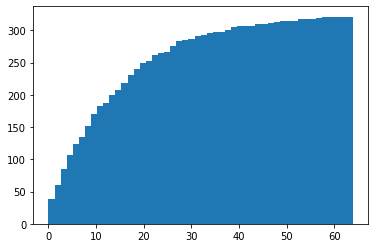

In [9]:
plt.hist(test_df["%pix_ext_na"], bins=50, cumulative=True)

Plotting histogram in the range 0 to 20.45 % image area for extrusions

(array([15., 16.,  5.,  8.,  6.,  7., 13.,  8.,  4.,  5.,  7.,  9.,  4.,
         7.,  4.,  7.,  4.,  4.,  4.,  6.,  2.,  7.,  7.,  7.,  4.,  4.,
         5.,  3.,  2.,  2.,  2.,  4.,  3.,  3.,  3.,  4.,  3.,  1.,  2.,
         5.,  2.,  2.,  4.,  7.,  0.,  3.,  6.,  3.,  5.,  1.]),
 array([ 0.   ,  0.409,  0.818,  1.227,  1.636,  2.045,  2.454,  2.863,
         3.272,  3.681,  4.09 ,  4.499,  4.908,  5.317,  5.726,  6.135,
         6.544,  6.953,  7.362,  7.771,  8.18 ,  8.589,  8.998,  9.407,
         9.816, 10.225, 10.634, 11.043, 11.452, 11.861, 12.27 , 12.679,
        13.088, 13.497, 13.906, 14.315, 14.724, 15.133, 15.542, 15.951,
        16.36 , 16.769, 17.178, 17.587, 17.996, 18.405, 18.814, 19.223,
        19.632, 20.041, 20.45 ]),
 <a list of 50 Patch objects>)

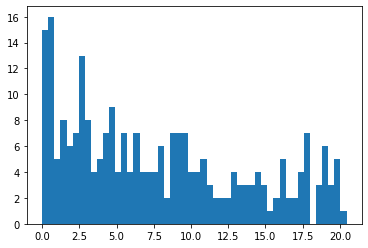

In [10]:
plt.hist(test_df["%pix_ext_na"], bins=50, cumulative=False, range=(0,20.45))

# Select characeristic images

In [20]:
import matplotlib.pyplot as plt
cnt = 0

4


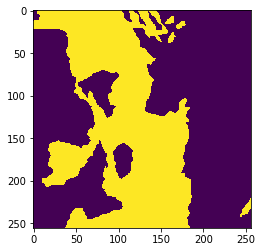

In [28]:
for img, mask in test_ds:
    if (mask.numpy()==2).sum() > 20000:
        plt.imshow(mask.numpy()[0,:,:,0])
        print(cnt)
        cnt += 1
        break